In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
x = np.linspace(0,2,100)
er = np.random.random_sample(size=100)/2 - 0.5

y = np.sin(x**2) + er

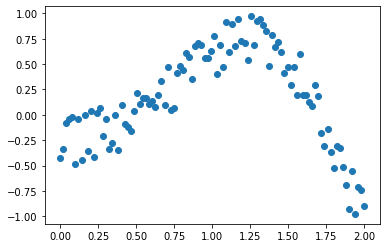

In [3]:
fig, ax = plt.subplots()
plt.plot(x, y, 'o')

plt.show()

In [4]:
x = x.reshape(-1,1)

# **Part A**

In [12]:
param_grid = {'C': [15,20,10,9,8,7,6,5,4,3,2,1,0.0001,0.00001,0.01,0.1],'gamma': [1,2,3,4,5,6,7,8,9,10,0.00001,0.001,0.01,0.1]}

### **Best gamma and C values for polynomial kernel**

In [6]:
poly_regressor = svm.SVR(kernel='poly',degree=3,epsilon=0.1, coef0=1)

grid = GridSearchCV(poly_regressor, param_grid=param_grid, cv=5)
grid.fit(x, y)
opt_poly = grid.best_estimator_
print('The best gamma and C values for polynomial kernel:'+str(opt_poly))

The best gamma and C values for polynomial kernel:SVR(C=0.01, coef0=1, gamma=10, kernel='poly')


### **Best gamma and C values for RBF kernel**

In [13]:
rbf_regressor = svm.SVR(kernel='rbf')

grid = GridSearchCV(rbf_regressor, param_grid=param_grid, cv=5)
grid.fit(x, y)
opt_rbf = grid.best_estimator_
print('The best gamma and C values for RBF kernel:'+str(opt_rbf))

The best gamma and C values for RBF kernel:SVR(C=15, gamma=1)


### **Best gamma and C values for linear kernel**


In [8]:
linear_regressor = svm.SVR(kernel='linear')

grid = GridSearchCV(linear_regressor, param_grid=param_grid, cv=5)
grid.fit(x, y)
opt_linear = grid.best_estimator_
print('The best gamma and C values for linear kernel:'+str(opt_linear))

The best gamma and C values for linear kernel:SVR(C=0.0001, gamma=1, kernel='linear')


# **Part B**

### **Polynomial**



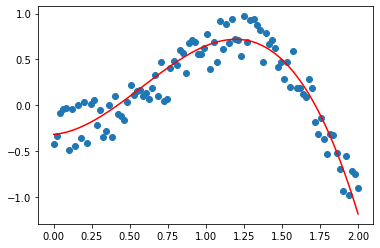

In [9]:
plt.scatter(x, y)
plt.plot(x, opt_poly.predict(x), color = 'red')
plt.show()

### **RBF**

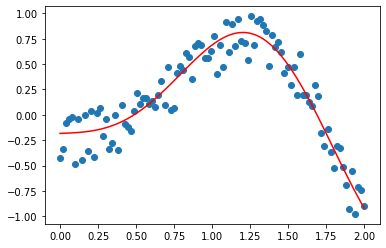

In [14]:
plt.scatter(x, y)
plt.plot(x, opt_rbf.predict(x), color = 'red')
plt.show()

### **Linear**

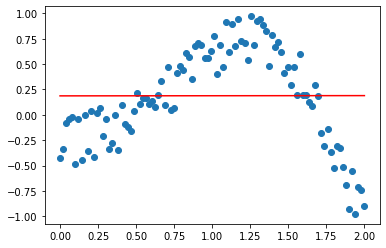

In [11]:
plt.scatter(x, y)
plt.plot(x, opt_linear.predict(x), color = 'red')
plt.show()

## **Comparison**

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
print('error of polynomial kernel = '+ str(mean_squared_error(y, opt_poly.predict(x))))
print('error of linear kernel = '+str(mean_squared_error(y, opt_linear.predict(x))))
print('error of rbf kernel = '+str(mean_squared_error(y, opt_rbf.predict(x))))

error of polynomial kernel = 0.028307844545877373
error of linear kernel = 0.22710749630541716
error of rbf kernel = 0.023383956438304408


### **According to the shape of the function, the linear kernel has the worst result and cannot predict the curve correctly. The rbf kernel moves the data to a space with more dimensions than the polynomial and has less error than the others.**